# Gaussian Mixture Models
In this notebook we will take a look at Gaussian mixture models (GMMs), which can be viewed as an extension of the ideas behind k-means, but can also be a powerful tool for estimation beyond simple clustering.
We begin with the standard imports:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

A Gaussian mixture model (GMM) attempts to find a mixture of multi-dimensional Gaussian probability distributions that best model any input dataset. In the simplest case, GMMs can be used for finding clusters in the same manner as k-means. Generate 400 samples divided in 4 blobs with `cluster_std=0.60, random_state=0`.

In [2]:
# Generate some data
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)

Now import the `GaussianMixture` object from `sklearn.mixture`. Fit a gaussian mixture with 4 components. The method `.predict()` of this object will assign each point to the most probable component.

In [3]:
from sklearn.mixture import GaussianMixture

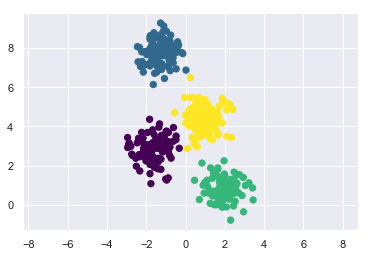

In [6]:
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');
plt.axis('equal');

Precisely because GMM is a probabilistic model, it is also possible to find probabilistic cluster assignments. In Scikit-Learn this is done using the `.predict_proba` method. Compute the probabilities for the dataset you have generated, print the shape of the ouput. What are the dimensions? Compute the sum for each row, interpret the results.

In [11]:
proba = gmm.predict_proba(X)

In [12]:
a[0]

array([2.76240973e-07, 4.69238090e-01, 1.75162717e-22, 5.30761633e-01])

In [13]:
proba.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

If we want to obtain the abolute probabilities for each sample we can use the `score_samples` method. This will compute the log probability density for each sample. Compute the probabilities for each example of the previous dataset.

In [15]:
np.exp(gmm.score_samples(X))

array([0.00039538, 0.02092562, 0.01055718, 0.09765629, 0.02830027,
       0.08848759, 0.11258937, 0.03160782, 0.09512812, 0.08814176,
       0.10106811, 0.04202195, 0.00251876, 0.02906484, 0.04136556,
       0.00914969, 0.01354278, 0.07511303, 0.07185325, 0.04671242,
       0.039645  , 0.07727765, 0.03463146, 0.09007986, 0.08302968,
       0.02146888, 0.0387607 , 0.01793941, 0.04730073, 0.00551052,
       0.02215141, 0.03361858, 0.04191287, 0.02166137, 0.01154194,
       0.12038273, 0.11808309, 0.06326025, 0.09843392, 0.08393965,
       0.10298148, 0.05355661, 0.09950141, 0.00631213, 0.07174561,
       0.11774701, 0.02672592, 0.10372668, 0.03640213, 0.08808512,
       0.10555926, 0.03761825, 0.02554023, 0.05919349, 0.09980794,
       0.01601381, 0.04269647, 0.11831877, 0.00396911, 0.0018679 ,
       0.1070484 , 0.05389242, 0.0731864 , 0.02283655, 0.09140278,
       0.07278054, 0.12156992, 0.00491241, 0.0116259 , 0.00194055,
       0.07238421, 0.06085544, 0.07138651, 0.08547546, 0.01873

The following code generates a plot of the gmm fitted to a set of points and the shape of the fitted gaussian distributions

In [16]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    elif covariance.shape == (2,):
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    else:
        angle = 0
        height = 2 * np.sqrt(covariance)
        width = 2 * np.sqrt(covariance)
        
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    if gmm.covariance_type == 'tied':
        for pos, w in zip(gmm.means_, gmm.weights_):
            draw_ellipse(pos, gmm.covariances_, alpha=w * w_factor, color = 'red')
    else:
        for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
            draw_ellipse(pos, covar, alpha=w * w_factor, color = 'red')

Plot the Gaussian Mixture for the dataset you have created.

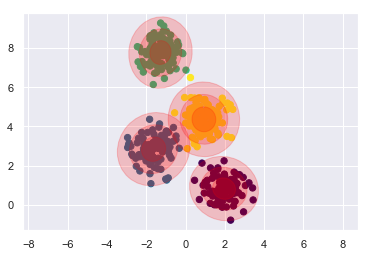

In [17]:
plot_gmm(gmm,X)

Similarly, we can use the GMM approach to fit a dataset with stretched clusters. The following code will stretch out the previous points.

In [ ]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

Now fit the GaussianMixture to this new data and plot the results. Try different covariance types

## GMM as density estimation
Though GMM can be used as a clustering algorithm, fundamentally it is an algorithm for density estimation. The result of a GMM fit to some data is technically not a clustering model, but a generative probabilistic model describing the distribution of the data. As an example, generate the circles from sklearn. Generate 200 samples and plot the data set.

Now create a GMM with two components and plot the results of the fit. What are your conclusions?

Let us think about the GMM as a density estimation model, create a new GMM with 20 components and fit the data. Plot the results with the option `label=False`.

Here the mixture of 20 Gaussians serves not to find separated clusters of data, but rather to model the overall distribution of the input data. This is a generative model of the distribution, meaning that the GMM gives us the recipe to generate new random data distributed similarly to our input. Now generate new data from the fitted distribution. You may generate points with the method `sample`. Generate 200 points and plot them.

## How do we choose the appropriate number of components?

The fact that GMM is a generative model gives us a natural means of determining the optimal number of components for a given dataset. A generative model is inherently a probability distribution for the dataset, and so we can simply evaluate the likelihood of the data under the model, using cross-validation to avoid over-fitting. Another means of correcting for over-fitting is to adjust the model likelihoods using some analytic criterion such as the Akaike information criterion (AIC) or the Bayesian information criterion (BIC). Scikit-Learn's GMM estimator actually includes built-in methods that compute both of these, and so it is very easy to operate on this approach.

Let's look at the AIC and BIC as a function as the number of GMM components for our circles dataset. Generate models with number of components between 4 and 30, `random_sate=0` and store the BIC and AIC for each model. Finally plot them in a single plot.

Extract the number of components that minimizes the AIC and the BIC. You may do so with `np.argmax`

## Generating images of hand-written digits
We just saw a an example of using GMM as a generative model of data in order to create new samples from the distribution defined by the input data. Here we will run with this idea and generate new handwritten digits from the MNIST dataset. Load the dataset with `load_digits`. 

Make a 10x10 plot of images

GMMs can have difficulty converging in such a high dimensional space, so we will start with an invertible dimensionality reduction algorithm on the data. Here we will use a straightforward PCA, asking it to preserve 99% of the variance in the projected data.

Select the number of components that minimizes the AIC. Now let us fit this model to the data and check it has converged with `.converged_`.

Now draw samples of 100 new points within this 41-dimensional projected space, using the GMM as a generative model. 

Finally, inverse transform the PCA object to construct the new digits and plot them.